In [4]:
!pwd

import os
os.chdir("../../..")
!pwd

/home/breuer/ventilation_system/preplanning/src/preplanning/postprocessing
/home/breuer/ventilation_system/preplanning


In [10]:
from importlib.resources import files
import numpy as np
import matplotlib.pyplot as plt
from pyomo2h5 import load_yaml

from load_case_clustering import (
    data,
    compute_required_volume_flows,
    merge_rooms,
    analyze_cluster_quality,
    cluster_time_slots_by_q,
    save_scenario_data_to_yaml,
    compute_theoretical_max_q_per_zone,
    add_max_load_case,
)  # assuming the yaml lives in load_case_clustering/data/general.yml


plt.style.use("FST_bw.mplstyle")

In [11]:

yaml_path = files(data).joinpath("general.yml")

general_data = load_yaml(yaml_path)
building_data = load_yaml("data/load_case_data/raw_GPZ_load_cases.yml")

df = compute_required_volume_flows(general_data, building_data, overview_flag=False)
df = merge_rooms(df, building_data)

analysis = analyze_cluster_quality(df, 10)

best_k = max(analysis["silhouette"], key=analysis["silhouette"].get)
print(
    f"Best #clusters according to silhouette metric is {best_k}.\nNow Proceeding computing output with {best_k} clusters"
)

del analysis["silhouette"][9], analysis["silhouette"][10]


Best #clusters according to silhouette metric is 5.
Now Proceeding computing output with 5 clusters


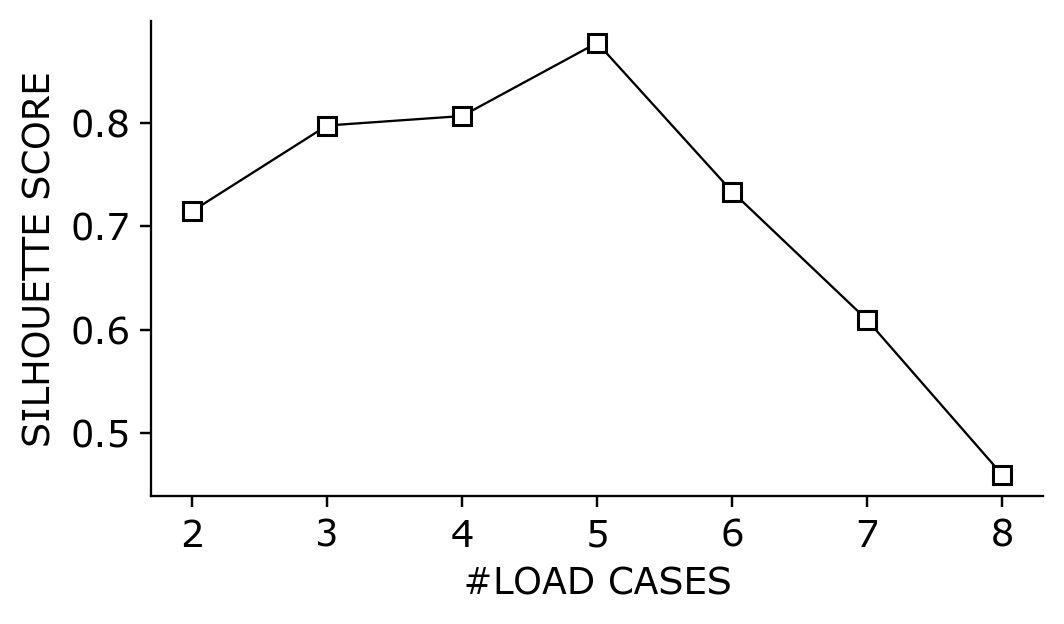

In [23]:

plt.figure(figsize=(5,3))


plt.plot(analysis["silhouette"].keys(),analysis["silhouette"].values(), "-",marker="s",markeredgecolor="k",markerfacecolor="w")
plt.xlabel("#LOAD CASES")
plt.ylabel("SILHOUETTE SCORE")

plt.tight_layout()

plt.savefig("plots/full_paper/silhouette_score.png")
plt.savefig("plots/full_paper/silhouette_score.svg")
plt.savefig("plots/full_paper/silhouette_score.pdf")